# PART 1

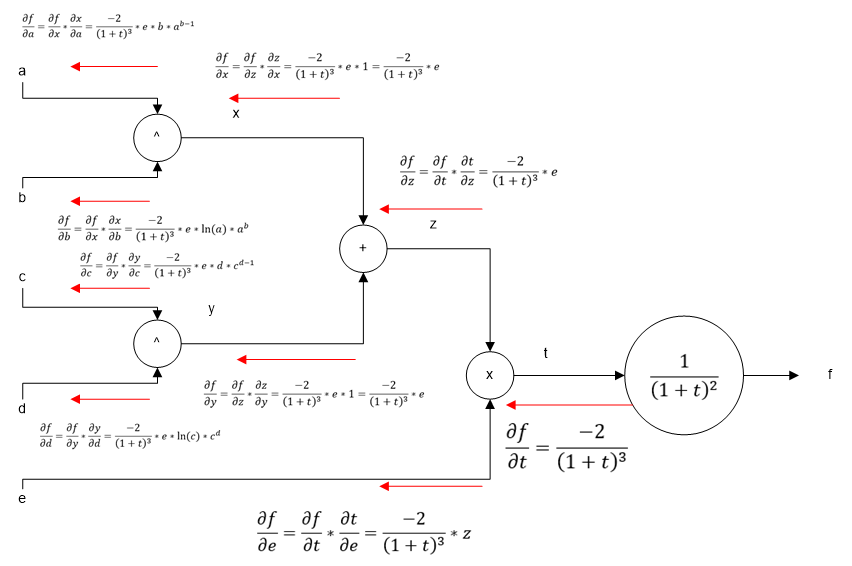

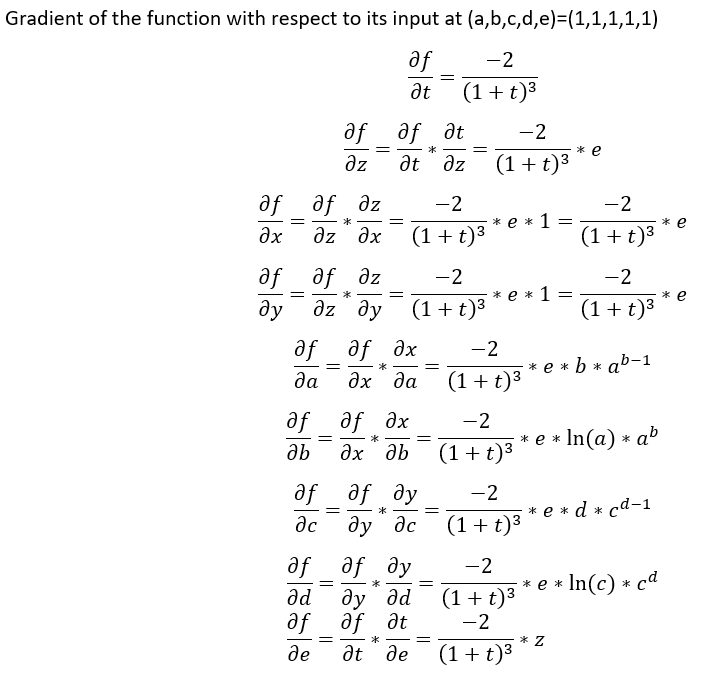

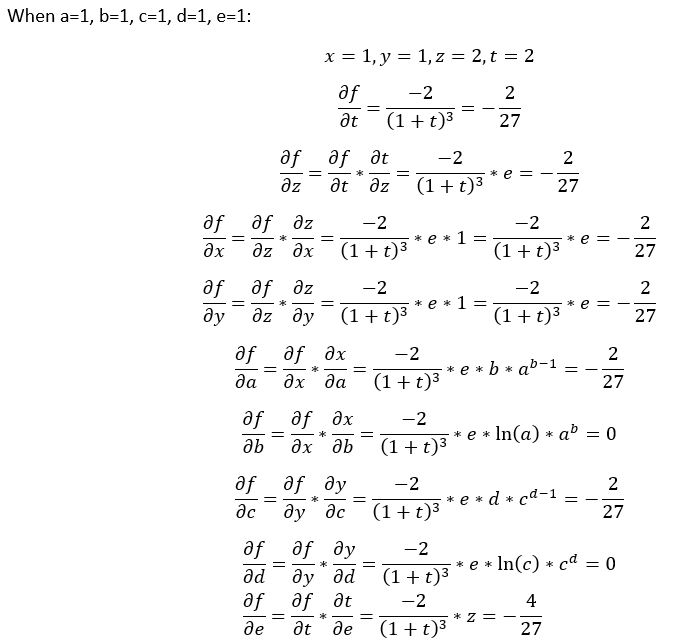

In [ ]:
# load required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# PART 2

# Question 2.1: Write a function to compute the mean squared error between a prediction and ground truth.

In [ ]:
truth  = np.array([10, 12, 15, 18, 21]) # example: truth array
predict = np.array([8, 14, 17, 13, 25]) # example: prediction array

def MSE(truth,predict):
    error=np.square(predict-truth).mean() # compute Mean Squared Error
    return error
print( 'Mean Squared Error is:',MSE(truth,predict))

Mean Squared Error is: 10.6


# Question 2.2: Consider a model: y = mx + c, where the model parameter m = 1 and parameter c = 0 and x ∈ (0, 1).

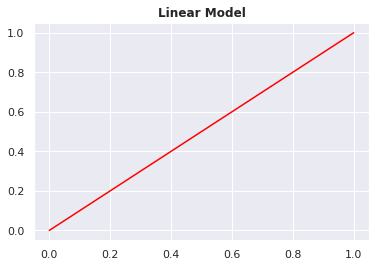

In [ ]:
def linearmodel(m,c,xmin,xmax):
    #import required packages
    import seaborn as sns
    import numpy as np
    sns.set()
    import matplotlib.pyplot as plt # import matplotlib package
    x=np.linspace(xmin,xmax,100) # creates 100 linearly spaced numbers between xmin and max
    y=m*x+c # built a linear model
    plt.plot(x,y,color='red')
    plt.title('Linear Model',fontsize=12,weight='bold')
    plt.show()
linearmodel(1,0,0,1)

# Question 2.3: Generate example data by drawing N = 100 uniform values from the range in which x lies, and compute the corresponding y. 

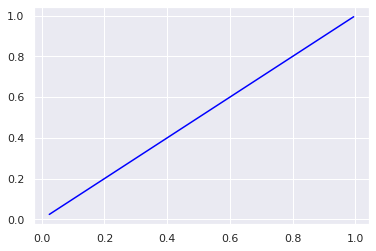

[[0.02415477 0.02415477]
 [0.02584484 0.02584484]
 [0.02662436 0.02662436]
 [0.03082189 0.03082189]
 [0.03113075 0.03113075]]


In [ ]:
def linear_model_pairs(m,c,xmin,xmax):
    #import required packages
    import numpy as np
    import seaborn as sns
    sns.set()
    import matplotlib.pyplot as plt
    from numpy import random
    random.seed(30)
    x=np.random.uniform(xmin,xmax,100)
    x=np.sort(x) # use random.uniform to produce uniformly distributed values
    y=m*x+c # built a linear model
    z=np.array((x,y)).T #create an array which shows (x,y)
    plt.plot(x, y, "blue")
    plt.show()
    return z
z=linear_model_pairs(1,0,0,1) # execute the function above
print(z[:5])

# Question 2.4: Assuming that you do not know the model parameters, use backpropagation and gradient descent updates to find the model parameters.

We applied stochastic gradient descent to find optimal parameters and updated each parameter by considering each observations over different learning rates.

In [ ]:
import numpy as np
X=z[:,:1]
y=z[:,1:2]
x1=X
y1=x1

from numpy import *
#MSE loss function
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss

indxlist=[]
loss_arraylist=[]
step_size=[0.25,0.65]

final_score={}

for j in range(2):
    #Start with initialize parameters randomly
    w=0
    b=0
    num_examples=x1.shape[0]
    indx=[]
    loss_array=[]
    print("Iterations with:",j, "learning rate") 

    #Gradient descent loop  
    for i in range(201):
        x=x1
        ypred=w*x+b
        loss1=mse_loss(ypred,y1)
        indx.append(i)
        loss_array.append(loss1)
        if i % 10==0:
            print ("iteration %d: loss %f" % (i,loss1))
        #Backpropate the gradient on loss to the parameters (w,b)
        dw=x*(-2/num_examples)*(y1-ypred)
        db=(-2/num_examples)*(y1-ypred)
        #update parameter
        w+=-step_size[j]*dw
        b+=-step_size[j]*db
    final_score[j]=ypred
    indxlist.append(indx)
    loss_arraylist.append(loss_array)
    print(w)
    print(b)

Iterations with: 0 learning rate
iteration 0: loss 0.311798
iteration 10: loss 0.265630
iteration 20: loss 0.226494
iteration 30: loss 0.193292
iteration 40: loss 0.165100
iteration 50: loss 0.141144
iteration 60: loss 0.120769
iteration 70: loss 0.103426
iteration 80: loss 0.088651
iteration 90: loss 0.076053
iteration 100: loss 0.065303
iteration 110: loss 0.056120
iteration 120: loss 0.048271
iteration 130: loss 0.041555
iteration 140: loss 0.035804
iteration 150: loss 0.030875
iteration 160: loss 0.026647
iteration 170: loss 0.023017
iteration 180: loss 0.019898
iteration 190: loss 0.017215
iteration 200: loss 0.014906
[[3.70330248e-04]
 [4.23950928e-04]
 [4.49903182e-04]
 [6.02886057e-04]
 [6.15024354e-04]
 [1.45107658e-03]
 [1.62723471e-03]
 [2.06963619e-03]
 [3.24809612e-03]
 [5.09147573e-03]
 [8.65403341e-03]
 [1.16920406e-02]
 [1.19648134e-02]
 [1.29815049e-02]
 [1.64232437e-02]
 [1.67183543e-02]
 [1.68136878e-02]
 [2.34053732e-02]
 [2.39461907e-02]
 [2.80246443e-02]
 [3.42795

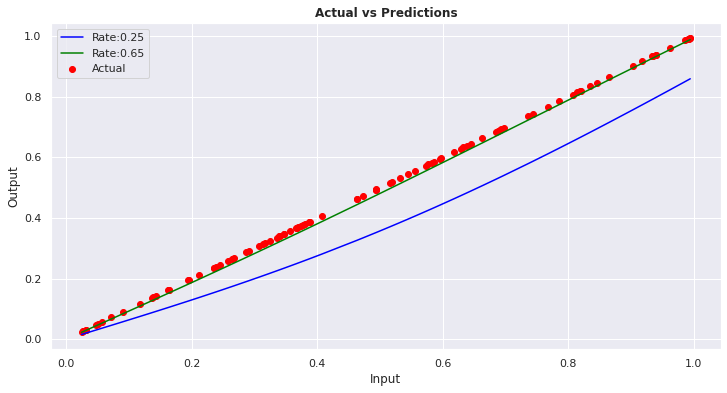

In [ ]:
#sns.set()
plt.figure(figsize=(12,6))
ax=plt.scatter(X, y, color = 'red',label='Actual')
plt.plot(X, final_score[0], color = 'blue',label='Rate:0.25')
plt.plot(X, final_score[1], color = 'green',label='Rate:0.65')
plt.legend()
plt.title('Actual vs Predictions',weight='bold')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

# Question 2.5: Plot the error in the estimates as a function of the number of iterations of gradient update. Change the learning rate and plot another curve on the previous plot.

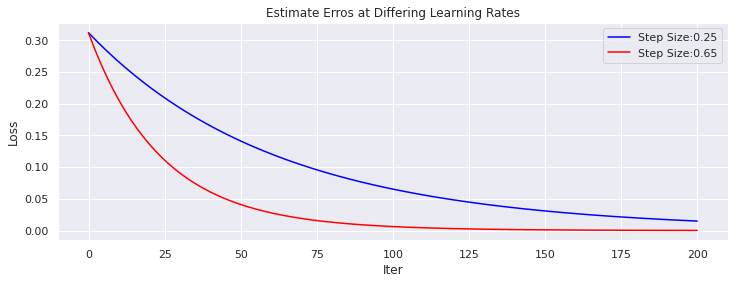

In [ ]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
import matplotlib.pyplot as plt
plt.plot(indxlist[0], loss_arraylist[0], "blue", label="Step Size:0.25")
plt.plot(indxlist[1], loss_arraylist[1], "red", label="Step Size:0.65")
plt.legend()
plt.title('Estimate Erros at Differing Learning Rates')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

This plot shows the difference in the true value of the parameter and the estimation of the parameter at each iteration. At each iteration, the estimated parameters further approach the real values of the parameters. This happens more quickly with a higher learning rate.

# Question 2.6: Do steps 3-5 when the model is y = m1x + m2x2 + c and the true parameters are m1 = 0.5, m2 = 1 and c = 1. And x ∈ (0,1). Also, plot the ground truth function.

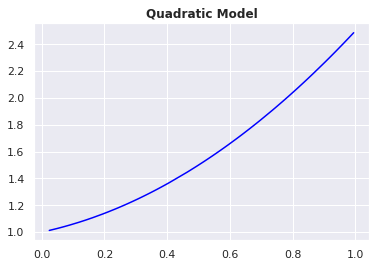

array([[0.02415477, 1.01266084],
       [0.02584484, 1.01359037],
       [0.02662436, 1.01402104],
       [0.03082189, 1.01636093],
       [0.03113075, 1.0165345 ]])

In [ ]:
def quadratic_model(m1,m2,c,xmin,xmax):
    # import required packages
    from numpy import random
    import seaborn as sns
    import numpy as np
    random.seed(30)
    sns.set()
    import matplotlib.pyplot as plt # import matplotlib package
    x=np.random.uniform(xmin,xmax,100) # creates 100 uniformly distributed values
    x=np.sort(x)
    y=(m1*x)+(m2*x**2)+c # built a quadratic model
    plt.plot(x,y,color='blue')
    plt.title('Quadratic Model',fontsize=12,weight='bold')
    plt.show()
    t=np.array((x,y)).T #create an array which shows (x,y)
    return t
t=quadratic_model(0.5,1,1,0,1) # execute the function above
t[:5]

In [ ]:
from numpy import *
random.seed(30)
x2 = np.random.uniform(0,1,100)
x2=np.sort(x2)
y2=0.5*x2+x2**2+1

#MSE loss function
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss

indxlist2=[]
loss_arraylist2=[]
step_size=[0.25,0.65]

final_score={}

for j in range(2):
    #Start with initialize parameters randomly
    m1=0
    m2=0
    c=0
    num_examples=x2.shape[0]
    indx2=[]
    loss_array2=[]
    
    print('Iterations with' + " " + str(step_size[j]) +  " " + 'learning rate')

    #Gradient descent loop  
    for i in range(201):
        x=x2
        ypred=m1*x+m2*x**2+c
        loss2=mse_loss(ypred,y2)
        indx2.append(i)
        loss_array2.append(loss2)
        if i % 10==0:
              print ("iteration %d: loss %f" % (i,loss2))

        #Backpropate the gradient on loss to the parameters (w,b)
        dm1=x*(-2/num_examples)*(y2-ypred)
        dm2=(x**2)*(-2/num_examples)*(y2-ypred)
        dc=(-2/num_examples)*(y2-ypred)

        #update parameter
        m1+=-step_size[j]*dm1
        c+=-step_size[j]*dc
        m2+=-step_size[j]*dm2
    
    final_score[j]=ypred
    indxlist2.append(indx2)
    loss_arraylist2.append(loss_array2)
    print(m1)
    print(c)
    print(m2)

Iterations with 0.25 learning rate
iteration 0: loss 2.601461
iteration 10: loss 2.169412
iteration 20: loss 1.817092
iteration 30: loss 1.528454
iteration 40: loss 1.290898
iteration 50: loss 1.094491
iteration 60: loss 0.931378
iteration 70: loss 0.795325
iteration 80: loss 0.681361
iteration 90: loss 0.585512
iteration 100: loss 0.504581
iteration 110: loss 0.435993
iteration 120: loss 0.377659
iteration 130: loss 0.327879
iteration 140: loss 0.285265
iteration 150: loss 0.248677
iteration 160: loss 0.217175
iteration 170: loss 0.189983
iteration 180: loss 0.166454
iteration 190: loss 0.146048
iteration 200: loss 0.128315
[0.01552567 0.01662663 0.0171351  0.01988034 0.02008282 0.03113252
 0.03302046 0.03737676 0.04721817 0.05975986 0.07924488 0.09324848
 0.0944277  0.09873034 0.11239018 0.11350662 0.11386565 0.13710208
 0.13889336 0.15196935 0.17081534 0.17091724 0.17408727 0.17898262
 0.18913763 0.19538493 0.19599589 0.19809076 0.21474395 0.21830352
 0.23275952 0.23879735 0.2412348

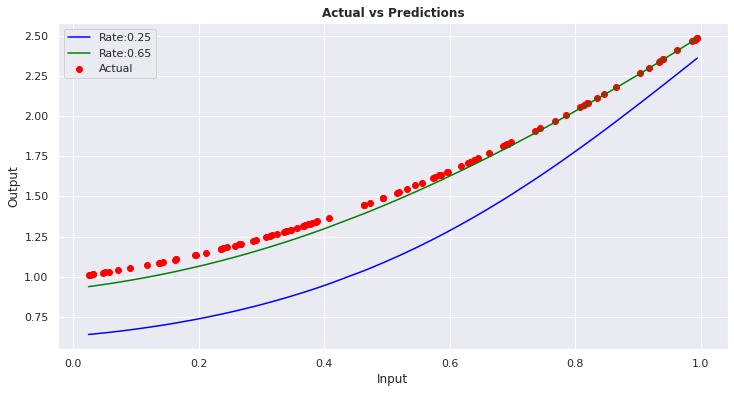

In [ ]:
#sns.set()
plt.figure(figsize=(12,6))
ax=plt.scatter(X, y2, color = 'red',label='Actual')
plt.plot(X, final_score[0], color = 'blue',label='Rate:0.25')
plt.plot(X, final_score[1], color = 'green',label='Rate:0.65')
plt.legend()
plt.title('Actual vs Predictions',weight='bold')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

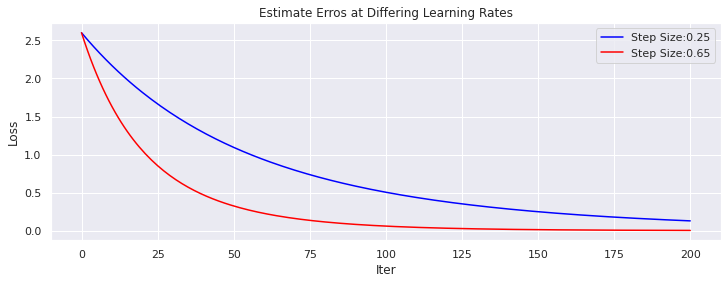

In [ ]:
sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(indxlist2[0], loss_arraylist2[0], "blue", label="Step Size:0.25")
plt.plot(indxlist2[1], loss_arraylist2[1], "red", label="Step Size:0.65")
plt.legend()
plt.title('Estimate Erros at Differing Learning Rates')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

# Question 2.7: Do steps 3-5 when the model is y = tanh(m ∗ x + c) and the true parameters are m = 1 and c = 2. And x ∈ (0, 2).

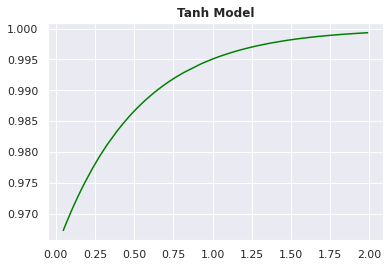

array([[0.04830954, 0.96728639],
       [0.05168967, 0.96750321],
       [0.05324873, 0.96760274],
       [0.06164378, 0.96813356],
       [0.0622615 , 0.96817228]])

In [ ]:
#Building the tanh model
def tanh_model(m,c,xmin,xmax) :
    # import required packages
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt 
    from numpy import random
    sns.set()
    random.seed(30)
    x=np.random.uniform(xmin,xmax,100) # creates 100 uniformly distributed values
    x=np.sort(x)
    y=m*x+c 
    z=np.tanh(y) # built a tangent model
    plt.plot(x,z,color='green')
    plt.title('Tanh Model',fontsize=12,weight='bold')
    plt.show()
    e=np.array((x,z)).T #create an array which shows (x,y)
    return e
e=tanh_model(1,2,0,2) # execute the function above
#Returning the first 5 x,y pairs
e[:5]

In [ ]:
#random.seed(30)
#x3 = np.random.uniform(0,2,100)
#x3 = np.sort(x3)
#y3=tanh(x3+2)

x3 = e[:,:1]
y3 = e[:,1:2]

#MSE loss function
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss
final_score={}
indxlist3=[]
loss_arraylist3=[]
step_size=[1,3]
for j in range(2):
    #Start with initialize parameters randomly
    w=0
    b=0
    num_examples=x3.shape[0]
    indx3=[]
    loss_array3=[]
    print('Iterations with' + " " + str(step_size[j]) +  " " + 'learning rate')
    #Gradient descent loop  
    for i in range(201):
        x=x3
        ypred=tanh(w*x+b)
        loss3=mse_loss(ypred,y3)
        indx3.append(i)
        loss_array3.append(loss3)
        if i % 10==0:
              print ("iteration %d: loss %f" % (i,loss3))
        #Backpropate the gradient on loss to the parameters (w,b)
        dw=x*(-2/num_examples)*(y3-ypred)*1/(cosh(w*x+b))**2
        db=(-2/num_examples)*(y3-ypred)*1/(cosh(w*x+b))**2
        #update parameter
        w+=-step_size[j]*dw
        b+=-step_size[j]*db
    final_score[j]=ypred
    indxlist3.append(indx3)
    loss_arraylist3.append(loss_array3)

Iterations with 1 learning rate
iteration 0: loss 0.981752
iteration 10: loss 0.462447
iteration 20: loss 0.280388
iteration 30: loss 0.192966
iteration 40: loss 0.143526
iteration 50: loss 0.112519
iteration 60: loss 0.091604
iteration 70: loss 0.076709
iteration 80: loss 0.065649
iteration 90: loss 0.057160
iteration 100: loss 0.050467
iteration 110: loss 0.045073
iteration 120: loss 0.040644
iteration 130: loss 0.036950
iteration 140: loss 0.033828
iteration 150: loss 0.031158
iteration 160: loss 0.028851
iteration 170: loss 0.026839
iteration 180: loss 0.025072
iteration 190: loss 0.023508
iteration 200: loss 0.022115
Iterations with 3 learning rate
iteration 0: loss 0.981752
iteration 10: loss 0.185652
iteration 20: loss 0.088564
iteration 30: loss 0.055546
iteration 40: loss 0.039651
iteration 50: loss 0.030487
iteration 60: loss 0.024589
iteration 70: loss 0.020502
iteration 80: loss 0.017517
iteration 90: loss 0.015249
iteration 100: loss 0.013471
iteration 110: loss 0.012042
i

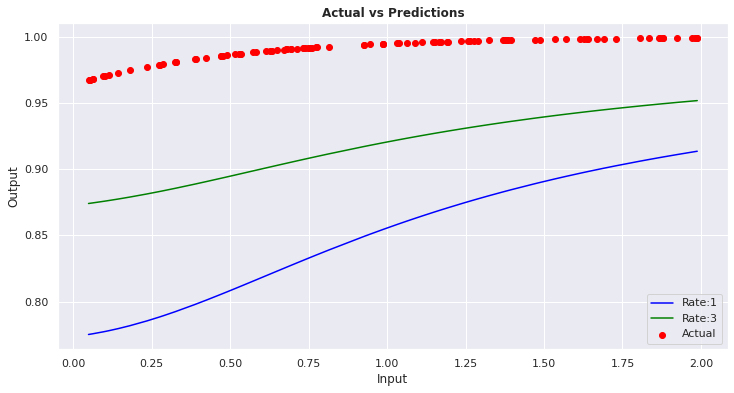

In [ ]:
sns.set()
plt.figure(figsize=(12,6))
ax=plt.scatter(x3, y3, color = 'red',label='Actual')
plt.plot(x3, final_score[0], color = 'blue',label='Rate:1')
plt.plot(x3, final_score[1], color = 'green',label='Rate:3')
plt.legend()
plt.title('Actual vs Predictions',weight='bold')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

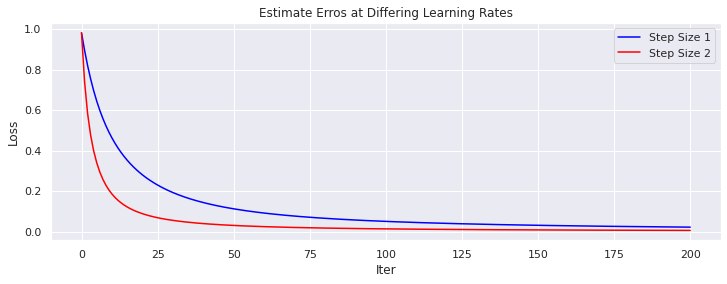

In [ ]:
sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(indxlist3[0], loss_arraylist3[0], "blue", label="Step Size 1")
plt.plot(indxlist3[1], loss_arraylist3[1], "red", label="Step Size 2")
plt.legend()
plt.title('Estimate Erros at Differing Learning Rates')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

----------------------------------------------------------------------

# PART 3

# Question 3.1: Write a function to compute the multiclasslogistic loss (also called the cross- entropy loss) given the parameters(W, b) of a linear model as numpy arrays.

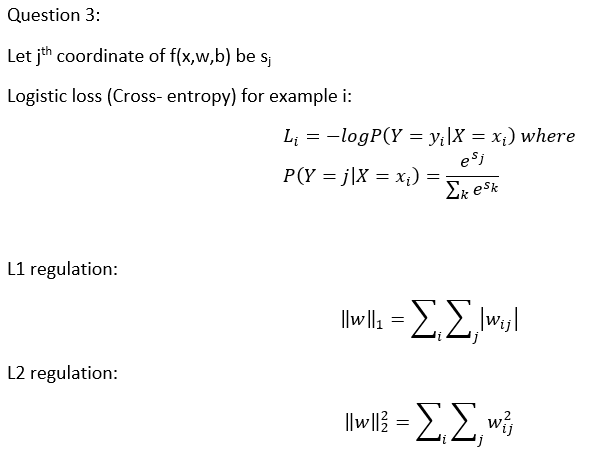

In [ ]:
def logistic_loss(X,y):

    #Define some local varaibles
    D = X.shape[1] #Number of features
    K = max(y)+1 #Number of classes assuming class index starts from 0
    
    # Linear model: Start with an initialize parameters randomly
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
    
    # Initial values from hyperparameter
    reg = 1e-3 # regularization strength
    
    #For simplicity we will take the batch size to be the same as number of examples
    num_examples = X.shape[0]

    #Initial value for the Gradient Descent Parameter
    step_size = 1e-0 # Assign learning rate

    # gradient descent loop
    for i in range(200):
  
        # evaluate class scores, [N x K]
        scores = np.dot(X, W) + b 
  
        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K] # normalize probabilities
  
        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        if i % 10 == 0:
            print("iteration: "+str(i) +" loss: "+str(data_loss))
        
        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples
  
        # backpropogate the gradient to the parameters (W,b)
        dW = np.dot(X.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)
  
        dW += reg*W # regularization gradient
  
        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
    return data_loss

# Question 3.2: Add an l1 regularization and an l2 regularization to the loss function.

3.2 with L1 regularization: It adds regularization parameter as sum of weights

In [ ]:
def logistic_loss_l1(X,y):

    #Define some local varaibles
    D = X.shape[1] #Number of features
    K = max(y)+1 #Number of classes assuming class index starts from 0
    
    # Initial values from hyperparameter
    reg = 1e-3 # regularization strength
    
    # Linear model: Start with an initialize parameters randomly
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
    
    #For simplicity we will take the batch size to be the same as number of examples
    num_examples = X.shape[0]

    #Initial value for the Gradient Descent Parameter
    step_size = 1e-0 #Also called learning rate

    # gradient descent loop
    for i in range(200):
  
        # evaluate class scores, [N x K]
        scores = np.dot(X, W) + b 
  
        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K] # normalize probabilities
  
        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_l1_loss = 0.5*reg*np.sum(np.abs(W))
        loss= data_loss + reg_l1_loss
        if i % 10 == 0:
            print("iteration: "+str(i) +" loss: "+str(loss))
            
        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples
  
        # backpropogate the gradient to the parameters (W,b)
        dW = np.dot(X.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)
  
        dW += reg*W # regularization gradient
  
        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db 
    return loss

3.2 with L2 regularization: It adds regularization parameter as square of weights

In [ ]:
def logistic_loss_l2(X,y):

    #Define some local varaibles
    D = X.shape[1] #Number of features
    K = max(y)+1 #Number of classes assuming class index starts from 0
    
    # Initial values from hyperparameter
    reg = 1e-3 # regularization strength
    
    # Linear model: Start with an initialize parameters randomly
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
    
    #For simplicity we will take the batch size to be the same as number of examples
    num_examples = X.shape[0]

    #Initial value for the Gradient Descent Parameter
    step_size = 1e-0 #Also called learning rate

    # gradient descent loop
    for i in range(200):
  
        # evaluate class scores, [N x K]
        scores = np.dot(X, W) + b 
  
        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K] # normalize probabilities
  
        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_l2_loss = 0.5*reg*np.sum(W*W)
        loss= data_loss + reg_l2_loss
        if i % 10 == 0:
            print("iteration: "+str(i) +" loss: "+str(loss))
            
        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples
  
        # backpropogate the gradient to the parameters (W,b)
        dW = np.dot(X.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)
  
        dW += reg*W # regularization gradient
  
        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db 
    return loss

------------------------------------------------------------------------

# PART 4

# Question 4.1: Generate data from Data Linear Classifier.ipynb


In [ ]:
import numpy as np
import pickle
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,1,N) # radius
      t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j

pickle.dump(X,open('dataX.pickle','wb'))
pickle.dump(y,open('dataY.pickle','wb'))

In [ ]:
#Read data
X = pickle.load(open('dataX.pickle','rb'))
y = pickle.load(open('dataY.pickle','rb'))

# Question 4.2: Split the data into test and train (20%:80%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('training size:',X_train.shape, y_train.shape)
print('testing size:', X_test.shape, y_test.shape)

# Question 4.3: Build a linear classifier assuming the multiclass logistic loss and an l2 regularization for the weights only. 

In [ ]:
#Define some local varaibles
np.random.seed(0)
D = X_train.shape[1] #Number of features
K = max(y)+1 #Number of classes assuming class index starts from 0

# Linear model
# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
reg = 1e-3 # regularization strength

#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 0.01 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.

# gradient descent loop
for i in range(350):
    # evaluate class scores, [N x K]
    scores = np.dot(X_train, W) + b 
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K] # normalize probabilities
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y_train])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print("iteration: "+str(i) +" loss: "+str(loss))
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y_train] -= 1
    dscores /= num_examples
  
    # backpropogate the gradient to the parameters (W,b)
    dW = np.dot(X_train.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

Results on training data: Accuracy, Confusion Matrix and Plot

In [ ]:
scores_train=np.dot(X_train, W) + b 
exp_scores = np.exp(scores_train)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

predicted_train_class=np.argmax(probs, axis=1)
print('Accuracy on training data:',round(np.mean(predicted_train_class == y_train),4))

The accuracy on the training data is rather low.

In [ ]:
plt.figure(figsize=(4,4))
cfx=confusion_matrix(y_train, predicted_train_class)
sns.heatmap(cfx, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.tight_layout()
plt.show()

In [ ]:
sns.set_style("whitegrid")
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

This graph is indicative of why the training accuracy was so low. There is quite a bit of difference between the class prediction areas and the actual classes of the data. This suggests that the actual data follows a non-linear pattern, and perhaps a different classifier would be more effective.

Results on testing data: Accuracy, Confusion Matrix and Plot

In [ ]:
scores_test=np.dot(X_test, W) + b 
exp_scores = np.exp(scores_test)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

predicted_test_class=np.argmax(probs, axis=1)
print('Accuracy on testing data:',round(np.mean(predicted_test_class == y_test),4))

As expected, the testing accuracy is a bit lower than the training.

In [ ]:
plt.figure(figsize=(4,4))
confusion_matrix(y_test, predicted_test_class)
sns.heatmap(cfx, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.tight_layout()
plt.show()

In [ ]:
sns.set_style("whitegrid")
h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

The plot for the test data follows a similar trend as the train, with many points being classified incorrectly. Again, it seems as though a non-linear classifier would perform better on the dataset.

# Question 4.4: Introduce a cross validation scheme and justify your choice of parameters. What is the validation accuracy compare to the test accuracy.

In [ ]:
np.random.seed(0)

kf=KFold(n_splits=6, shuffle=False, random_state=None) # train/validation ratio is 5:1.

f=1

result_train=[]
result_test=[]

for train_index, validation_index in kf.split(X):
    
    print("Fold" + " " + str(f))
    
    X_train, X_validation = X[train_index], X[validation_index]
    y_train, y_validation = y[train_index], y[validation_index]
    #Linear model

    #Initiate parameters randomely
    np.random.seed(0)
    W=0.01*np.random.randn(D,K)
    b=np.zeros((1,K))

    #Initial values from hyperparameter
    reg=1e-3

    #batch size=number of examples
    num_examples=X_train.shape[0]

    #Initial value for Gradient Descent Parameter
    step_size=0.01

    #Gradient descent loop
    for i in range (350):
        scores=np.dot(X_train,W)+b

        #compute class probability
        exp_scores=np.exp(scores)
        probs=exp_scores/np.sum(exp_scores,axis=1, keepdims=True)

        #compute the loss- average cross-entropy loss and regularization
        correct_logprobs=-np.log(probs[range(num_examples),y_train])
        data_loss=np.sum(correct_logprobs)/num_examples
        reg_loss=0.5*reg*np.sum(W*W)
        loss=data_loss+reg_loss
        if i%10==0:
             print("iteration %d: loss %f"%(i,loss))

        #compute the gradient on scores
        dscores=probs
        dscores[range(num_examples),y_train]-=1
        dscores/=num_examples

        #backpropate the gradient to the parameters (W,b)
        dW=np.dot(X_train.T,dscores)
        db=np.sum(dscores,axis=0,keepdims=True)

        dW+=reg*W

        #Update parameter
        W+=-step_size*dW
        b+=-step_size*db
        
    f=f+1
    scores_train=np.dot(X_train,W)+b
    predicted_class_train=np.argmax(scores_train,axis=1)
    print('train accuracy: %.2f' % (np.mean(predicted_class_train==y_train)))

    scores_test=np.dot(X_test,W)+b
    predicted_class_test=np.argmax(scores_test,axis=1)
    print('test accuracy: %.2f' % (np.mean(predicted_class_test==y_test)))
    
    result_train.append(np.mean(predicted_class_train==y_train))
    result_test.append(np.mean(predicted_class_train==y_train))

In [ ]:
round(np.array(result_test).mean(),4) # Av. accuracy performance on validation dataset across all folds

The accuracy improves from 51% to 56% when using cross validation. While there is improvement, we still feel the biggest change in accuracy could be seen with a switch to a non-linear classifier.

# Question 4.5: What is the sensitivity of the model’s performance to different learning rates and the number of gradient descent iterations.

4.5.1 : Learning Rate Effect

In [ ]:
# Linear model
# Start with an initialize parameters randomly
np.random.seed(5)
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
reg = 1e-3 # regularization strength

#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = [0.001,0.01,0.025,0.05,0.10,1] #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.
result_train={}
result_test={}

weight=[]
intercept=[]
# gradient descent loop
for j in step_size:
    print('Softmax Classifier Model with:',str(j) + ' learning rate')
    for i in range(350):
  
        # evaluate class scores, [N x K]
        scores = np.dot(X_train, W) + b 
  
        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K] # normalize probabilities
  
        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = round(data_loss + reg_loss,3)
        if i % 10 == 0:
            print("iteration: "+str(i) +" loss: "+str(loss))
  
        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples
  
        # backpropogate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)
  
        dW += reg*W # regularization gradient
  
        # perform a parameter update
        W += -i * dW
        b += -i * db
        
        weight.append(W)
        intercept.append(b)
        
        scores_train=np.dot(X_train, W) + b 
        exp_scores = np.exp(scores_train)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        predicted_train_class=np.argmax(probs, axis=1)
        result_train[j]=round(np.mean(predicted_train_class == y_train),3)
        
        scores_test=np.dot(X_test, W) + b 
        exp_scores = np.exp(scores_test)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        predicted_test_class=np.argmax(probs, axis=1)
        result_test[j]=round(np.mean(predicted_test_class == y_test),3) 

In [ ]:
result_train # shows accuracy of train dataset over different shrinkage rates

In [ ]:
sns.set_style('darkgrid')
step_size=list(result_train.keys())
accur=list(result_train.values())
plt.figure(figsize=(12,4))
sns.lineplot(step_size,accur)
plt.title('Accuracy on data among different shrinkage rates (train)',weight='bold')
plt.xlabel('Shrinkage Rate')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Analysis: We checked accuracy on test data and decided learning rate as 0.001
result_test # shows accuracy of test dataset over different shrinkage rates

In [ ]:
sns.set_style('darkgrid')
step_size=list(result_test.keys())
accur=list(result_test.values())
plt.figure(figsize=(12,4))
sns.lineplot(step_size,accur)
plt.title('Accuracy on data among different shrinkage rates (test)',weight='bold')
plt.xlabel('Shrinkage Rate')
plt.ylabel('Accuracy')
plt.show()

It is evident in the plot above that the accuracy of the validation is sensitive to the learning rate. Among the six learning rates we tried (0.001, 0.01, 0.025, 0.05, 0.10, and 1), the accuracy varied from 0.283 to 0.5.  

4.5.2 : Number Of Iterations Effect

In [ ]:
# Linear model
# Start with an initialize parameters randomly
np.random.seed(3)
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
reg = 1e-3 # regularization strength

#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 0.01 #Also called learning rate, best based on previous question

#For simplicity, we will not hand tune this algorithm parameter as well.
result_train_iter={}
result_test_iter={}

iter_number = [200,250,300,350,400,450,500]
# gradient descent loop
for i in iter_number:
    np.random.seed(3)
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
    z=np.arange(0,i)
    print("The model with: "+str(i) +" iterations")
    for j in z:
        # evaluate class scores, [N x K]
        scores = np.dot(X_train, W) + b 
  
        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K] # normalize probabilities
  
        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = round(data_loss + reg_loss,7)
        if j % 10 == 0:
            print("iteration: "+str(j) +" loss: "+str(loss))
  
        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples
  
        # backpropogate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)
  
        dW += reg*W # regularization gradient
  
        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        
        scores_train=np.dot(X_train, W) + b 
        exp_scores = np.exp(scores_train)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        predicted_train_class=np.argmax(probs, axis=1)
        result_train_iter[j]=round(np.mean(predicted_train_class == y_train),3)
        
        scores_test=np.dot(X_test, W) + b 
        exp_scores = np.exp(scores_test)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        predicted_test_class=np.argmax(probs, axis=1)
        result_test_iter[i]=round(np.mean(predicted_test_class == y_test),3) 

In [ ]:
result_train_iter

In [ ]:
sns.set_style('darkgrid')
step_size=list(result_train_iter.keys())
accur=list(result_train_iter.values())
plt.figure(figsize=(10,4))
sns.lineplot(step_size,accur)
plt.title('Accuracy on data among different number of iterations (train)',weight='bold')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
result_test_iter

In [ ]:
sns.set_style('darkgrid')
step_size=list(result_test_iter.keys())
accur=list(result_test_iter.values())
plt.figure(figsize=(10,4))
sns.lineplot(step_size,accur)
plt.title('Accuracy on data among different number of iterations (test)',weight='bold')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

We tried seven iteration values (200, 250, 300, 350, 400, 450, and 500) and found no sensitivity to the number of iterations.

# Question 4.6 : What is the sensitivity of the model’s performance to different regularization parameter values. Find the best regularization parameter using an exhaustive search procedure.

In [ ]:
# Linear model
# Start with an initialize parameters randomly
np.random.seed(3)
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
reg =  [0.001,0.01,0.05,0.1,0.5,1]# regularization strength

#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 0.05 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.
result_train={}
result_test={}

for g in reg:
    print("The model with: "+str(g) + ' ' + "regularization")
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
    for j in range(350):
            # evaluate class scores, [N x K]
        scores = np.dot(X_train, W) + b 
  
        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K] # normalize probabilities
  
        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*g*np.sum(W*W)
        loss = round(data_loss + reg_loss,7)
        if j % 10 == 0:
            print("iteration: "+str(j) +" loss: "+str(loss))
  
        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples
  
        # backpropogate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)
  
        dW += g*W # regularization gradient
  
        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        
        scores_train=np.dot(X_train, W) + b 
        exp_scores = np.exp(scores_train)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        predicted_train_class=np.argmax(probs, axis=1)
        result_train[g,j]=round(np.mean(predicted_train_class == y_train),3)
        
        scores_test=np.dot(X_test, W) + b 
        exp_scores = np.exp(scores_test)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        predicted_test_class=np.argmax(probs, axis=1)
        result_test[g,j]=round(np.mean(predicted_test_class == y_test),3) 

The plot below demonstrates the accuracy rates on the training data with varying regularization parameter values.

In [ ]:
import pandas as pd
train_KPI=pd.Series(result_train).reset_index()
train_KPI.columns=['Reg.','Iter.','Accuracy']
train_final=train_KPI.groupby('Reg.').max()['Accuracy']
train_final=pd.DataFrame(train_final).reset_index()
sns.set_style('darkgrid')
plt.figure(figsize=(12,4))
sns.lineplot(train_final['Reg.'],train_final['Accuracy'])
plt.title('Accuracy on data among different regularization values (train)',weight='bold')
plt.xlabel('Regularization')
plt.ylabel('Accuracy')
plt.show()

More importantly, we also examined the accuracy on the testing data with the varying parameters.

In [ ]:
# ANALYSIS: Best optimal regularization parameter is 0.001
import pandas as pd
test_KPI=pd.Series(result_test).reset_index()
test_KPI.columns=['Reg.','Iter.','Accuracy']
test_final=test_KPI.groupby('Reg.').max()['Accuracy']
test_final=pd.DataFrame(test_final).reset_index()
test_final

The chart above illustrates the variance in accuracy with different regularization parameters. We determined the optimal regularization parameter to be 0.001. This value minimizes the overfitting of the model to the training data, and therefore increases the testing accuracy. This is also demonstrated in the plot below.

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,4))
sns.lineplot(test_final['Reg.'],test_final['Accuracy'])
plt.title('Accuracy on data among different regularization values (test)',weight='bold')
plt.xlabel('Regularization')
plt.ylabel('Accuracy')
plt.show()

# Question 4.7: What is the sensitivity of the model’s performance with respect to a different test train split (e.g., 50%:50%)

When we split data into training and testing at 50:50 ratio, the accuracy on test data is slightly better than previous model in Question 4.3.

In [ ]:
#Read data
X = pickle.load(open('dataX.pickle','rb'))
y = pickle.load(open('dataY.pickle','rb'))

from sklearn.model_selection import train_test_split # import package

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

#Define some local varaibles
D = X_train.shape[1] #Number of features
K = max(y)+1 #Number of classes assuming class index starts from 0

# Linear model
# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
reg = 1e-3 # regularization strength

#For simplicity, we will not optimize this using grid search here.
#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 0.01 #Also called learning rate

# gradient descent loop
for i in range(350):
  
    # evaluate class scores, [N x K]
    scores = np.dot(X_train, W) + b 
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K] # normalize probabilities
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y_train])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print("iteration: "+str(i) +" loss: "+str(loss))
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y_train] -= 1
    dscores /= num_examples
  
    # backpropogate the gradient to the parameters (W,b)
    dW = np.dot(X_train.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

Results on training data: Accuracy, Confusion Matrix and Plot

In [ ]:
scores_train=np.dot(X_train, W) + b 
exp_scores = np.exp(scores_train)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

predicted_train_class=np.argmax(probs, axis=1)
print('Accuracy on training data:',round(np.mean(predicted_train_class == y_train),4))

Recall that the training accuracy with the 20:80 split used in the previous example was 0.5417.

In [ ]:
cfx2=confusion_matrix(y_test, predicted_train_class)
sns.heatmap(cfx2, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

Results on testing data: Accuracy, Confusion Matrix and Plot

In [ ]:
scores_test=np.dot(X_test, W) + b 
exp_scores = np.exp(scores_test)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

predicted_test_class=np.argmax(probs, axis=1)
print('Accuracy on testing data:',round(np.mean(predicted_test_class == y_test),4))

More importantly, the testing accuracy has also increased from 0.5 in the 20:80 split.

In [ ]:
cfx3=confusion_matrix(y_test, predicted_train_class)
sns.heatmap(cfx3, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.tight_layout()
plt.show()

In [ ]:
sns.set_style("whitegrid")
h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

-----------

# PART 5

# Question 5.1: Build the above classifiers using Keras and Tensorflow and solve the classification problem for MNIST/Fashion MNIST

Data Preparation & Analysis

In [ ]:
# Load packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Import dataset
fashion_mnist = keras.datasets.fashion_mnist

#Split data into training and testing
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Assign the class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Scaling images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Data Exploration
train_images.shape   #(60000,28,28)
len(train_labels)    # 60000
train_labels         #10
type(train_images)   # numpy array
test_images.shape    #(10000,28,28)
len(test_labels)     #10000

Below is an example visualization of one of the images in the training set.

In [ ]:
# Visualize one of the images
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Following are the first 25 images of the training set in a binary (black and white) color scheme, along with the class label for each of the images.

In [ ]:
#Display first 25 images from training set, along with their class label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Modeling

In [ ]:
#Build the actual models

#Model 1: a 2-layer feedforward neural network (i.e., 1 hidden layer with
#f(x, W1, b1, W2, b2) = W2 max(0, W1x + b1) + b2)
model1 = keras.Sequential([
    #First layer transforms the data from a two-dimensional to a one-dimensional array
    keras.layers.Flatten(input_shape=(28, 28)),
    #Hidden layer: f(x, W1, b1, W2, b2) = W2 max(0, W1x + b1) + b2)
    keras.layers.Dense(128, activation='relu'),
    #Output layer
    keras.layers.Dense(10)
])

#Compile the model - adds optimizer, loss and metrics
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Model 2: same as before but with leaky ReLU (f(x) = x if x > 0, else f(x) = 0.01 ∗ x)
model2 = keras.Sequential([
    #First layer transforms the data from a two-dimensional to a one-dimensional array
    keras.layers.Flatten(input_shape=(28, 28)),
    #Hidden layer: same as before but with leaky ReLU (f(x) = x if x > 0, else f(x) = 0.01 ∗ x)
    keras.layers.Dense(128),
    #Adding the leaky relu layer
    keras.layers.LeakyReLU(alpha=0.01),
    #Output layer
    keras.layers.Dense(10)
])

#Compile the model - adds optimizer, loss and metrics
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Training the model
model1.fit(train_images, train_labels, epochs=10)
model2.fit(train_images, train_labels, epochs=10)

In [ ]:
#Accuracy on test set
test_loss1, test_accrelu = model1.evaluate(test_images,  test_labels, verbose=2)
test_loss2, test_accleaky = model2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy of model 1 (no leaky relu):', round(test_accrelu,4))
print('\nTest accuracy of model 2 (leaky relu):', round(test_accleaky,4))

After completing the two variants of the model, we determined that the model without the Leaky ReLU performs slightly better, with an accuracy of 87.87% compared to 88.6% with the Leaky ReLU. 

# Question 5.2: Discuss how optimizer choice influences performance.

We implimented six different optimizers to compare the accuracies: adamax, ftrl, nadam, rmsprop, sgd, and adam. We implemented these using the ReLU and leaky ReLU models. 

In [ ]:
optimizer_list=['adamax','ftrl','nadam','rmsprop','sgd']
accuracyrelu={}
for i in optimizer_list:
  #Compile the model
  model1.compile(optimizer=i,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  #Train the model
  model1.fit(train_images, train_labels, epochs=10)
  #evaluate accuracy
  test_loss1, test_acc1 = model1.evaluate(test_images,  test_labels, verbose=2)

  print('\nTest accuracy:', test_acc1)
  accuracyrelu[i]=test_acc1

In [ ]:
accuracyrelu['adam']=test_accrelu
accuracyrelu

Based on the results, the best optimizer for the neural network when using the ReLU activation is sgd or adam.

In [ ]:
accuracyleakyrelu={}
for i in optimizer_list:
  #Compile the model
  model2.compile(optimizer=i,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  #Train the model
  model2.fit(train_images, train_labels, epochs=10)
  #evaluate accuracy
  test_loss1, test_acc1 = model1.evaluate(test_images,  test_labels, verbose=2)

  print('\nTest accuracy:', test_acc1)
  accuracyleakyrelu[i]=test_acc1

In [ ]:
accuracyleakyrelu['adam']=test_accleaky
accuracyleakyrelu

For the leaky ReLU, we found that adam is the best optimizer.

# Question 5.3: What happens when the number of hidden units chosen is much smaller. Similarly, what happens when the number of hidden units chosen is much higher?

ANALYSIS: Based on experiments below (24,128, 240 neurons in the hidden layer), when the number of hidden units chosen much higher, the accuracy of testing data increased gradually (small difference nearly 1%) since the model with higher hidden units could capture complex relations between inputs and outputs more than the model with smaller hidden units. (24 neurons - 86.6% accuracy, 128 neurons - 87.3% accuracy, 200 neuron - 88.6% accuracy)

The number of hidden units chosen is much smaller

In [ ]:
#Model 1: a 2-layer feedforward neural network (i.e., 1 hidden layer with
#f(x, W1, b1, W2, b2) = W2 max(0, W1x + b1) + b2)
model_small_1 = keras.Sequential([
    #First layer transforms the data from a two-dimensional to a one-dimensional array
    keras.layers.Flatten(input_shape=(28, 28)),
    #Hidden layer: f(x, W1, b1, W2, b2) = W2 max(0, W1x + b1) + b2)
    keras.layers.Dense(24, activation='relu'),
    #Output layer
    keras.layers.Dense(10)
])

#Compile the model - adds optimizer, loss and metrics
model_small_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Model 2: same as before but with leaky ReLU (f(x) = x if x > 0, else f(x) = 0.01 ∗ x)
model_small_2 = keras.Sequential([
    #First layer transforms the data from a two-dimensional to a one-dimensional array
    keras.layers.Flatten(input_shape=(28, 28)),
    #Hidden layer: same as before but with leaky ReLU (f(x) = x if x > 0, else f(x) = 0.01 ∗ x)
    keras.layers.Dense(24),
    #Adding the leaky relu layer
    keras.layers.LeakyReLU(alpha=0.01),
    #Output layer
    keras.layers.Dense(10)
])

#Compile the model - adds optimizer, loss and metrics
model_small_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Training the model
model_small_1.fit(train_images, train_labels, epochs=10)
model_small_2.fit(train_images, train_labels, epochs=10)

In [ ]:
#Accuracy on test set
test_loss3, test_acc3 = model_small_1.evaluate(test_images,  test_labels, verbose=2)
test_loss4, test_acc4 = model_small_2.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy of model 1 with small # of neurons:', round(test_acc3,4))
print('\nTest accuracy of model 2 with small # of neurons:', round(test_acc4,4))

The number of hidden units chosen is much higher

In [ ]:
#Model: a 2-layer feedforward neural network (i.e., 1 hidden layer with
#f(x, W1, b1, W2, b2) = W2 max(0, W1x + b1) + b2)
model_high_1 = keras.Sequential([
    #First layer transforms the data from a two-dimensional to a one-dimensional array
    keras.layers.Flatten(input_shape=(28, 28)),
    #Hidden layer: f(x, W1, b1, W2, b2) = W2 max(0, W1x + b1) + b2)
    keras.layers.Dense(240, activation='relu'),
    #Output layer
    keras.layers.Dense(10)
])

#Compile the model - adds optimizer, loss and metrics
model_high_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Model 2: same as before but with leaky ReLU (f(x) = x if x > 0, else f(x) = 0.01 ∗ x)
model_high_2 = keras.Sequential([
    #First layer transforms the data from a two-dimensional to a one-dimensional array
    keras.layers.Flatten(input_shape=(28, 28)),
    #Hidden layer: same as before but with leaky ReLU (f(x) = x if x > 0, else f(x) = 0.01 ∗ x)
    keras.layers.Dense(240),
    #Adding the leaky relu layer
    keras.layers.LeakyReLU(alpha=0.01),
    #Output layer
    keras.layers.Dense(10)
])

#Compile the model - adds optimizer, loss and metrics
model_high_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Training the model
model_high_1.fit(train_images, train_labels, epochs=10)
model_high_2.fit(train_images, train_labels, epochs=10)

In [ ]:
#Accuracy on test set
test_loss5, test_acc5 = model_high_1.evaluate(test_images,  test_labels, verbose=2)
test_loss6, test_acc6 = model_high_2.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy of model 1 with higher # of neurons:', round(test_acc5,4))
print('\nTest accuracy of model 2 with higher # of neurons:', round(test_acc6,4))